In [2]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt

In [4]:
flist=glob.glob("kalkulasi/*")

In [5]:
well_name = []
gr_hist = []
nphi_hist = []
rhob_hist = []
rt_hist = []
Vshale_hist = []
# PHIE_hist = []
PHIE_hist = []
PHIT_hist = []


gr_ticks = np.linspace(0,150,51) 
nphi_ticks = np.linspace(0,1,51) 
rhob_ticks = np.linspace(1,3,51) 
rt_ticks = np.linspace(-1,2,51) 
Vshale_ticks = np.linspace(0,1,51) 
# PHIE_ticks = np.linspace(0,1,51) 
PHIE_ticks = np.linspace(0,1,51) 
PHIT_ticks = np.linspace(0,1,51) 

gr_stats = []
nphi_stats = []
rhob_stats = []
rt_stats = []
Vshale_stats = []
# PHIE_stats = []
PHIE_stats = []
PHIT_stats = []


for file in flist:
    try:
        df = pd.read_csv(file)
        well_name.append(file.split('\\')[-1].replace('.csv', ''))
        gr_hist.append(np.histogram(df.GR, bins=50, range=(0,150))[0].tolist())
        nphi_hist.append(np.histogram(df.NPHI, bins=50, range=(0,1))[0].tolist())
        rhob_hist.append(np.histogram(df.RHOB, bins=50, range=(1,3))[0].tolist())
        rt_hist.append(np.histogram(np.log10(df.RT), bins=50, range=(-1,2))[0].tolist())
        Vshale_hist.append(np.histogram(df.Vshale, bins=50, range=(0,1))[0].tolist())
#         PHIE_hist.append(np.histogram(df.PHIE, bins=50, range=(0,1))[0].tolist())
        PHIE_hist.append(np.histogram(df.PHIE, bins=50, range=(0,1))[0].tolist())
        PHIT_hist.append(np.histogram(df.PHIE, bins=50, range=(0,1))[0].tolist())
        
        
        gr_stats.append([df.GR.mean(), np.percentile(df.GR, 5), np.percentile(df.GR, 95), np.var(df.GR)])
        nphi_stats.append([df.NPHI.mean(), np.percentile(df.NPHI, 5), np.percentile(df.NPHI, 95), np.var(df.NPHI)])
        rhob_stats.append([df.RHOB.mean(), np.percentile(df.RHOB, 5), np.percentile(df.RHOB, 95), np.var(df.RHOB)])
        rt_stats.append([np.mean(np.log10(df.RT)), np.percentile(np.log10(df.RT), 5), np.percentile(np.log10(df.RT), 95), np.var(np.log10(df.RT))])
        Vshale_stats.append([df.Vshale.mean(), np.percentile(df.Vshale, 5), np.percentile(df.Vshale, 95), np.var(df.Vshale)])
#         PHIE_stats.append([df.PHIE.mean(), np.percentile(df.PHIE, 5), np.percentile(df.PHIE, 95), np.var(df.PHIE)])
        PHIE_stats.append([df.PHIE.mean(), np.percentile(df.PHIE, 5), np.percentile(df.PHIE, 95), np.var(df.PHIE)])
        PHIT_stats.append([df.PHIT.mean(), np.percentile(df.PHIT, 5), np.percentile(df.PHIT, 95), np.var(df.PHIT)])
    except Exception as e:
        print(file, e)

        
gr_hist = np.array(gr_hist)
nphi_hist = np.array(nphi_hist)
rhob_hist = np.array(rhob_hist)
rt_hist = np.array(rt_hist)
Vshale_hist = np.array(Vshale_hist)
# PHIE_hist = np.array(PHIE_hist)
PHIE_hist = np.array(PHIE_hist)
PHIT_hist = np.array(PHIT_hist)

gr_hist = np.transpose((gr_hist.T - np.min(gr_hist,axis=1))/(np.max(gr_hist,axis=1) - np.min(gr_hist,axis=1)))
nphi_hist = np.transpose((nphi_hist.T - np.min(nphi_hist,axis=1))/(np.max(nphi_hist,axis=1) - np.min(nphi_hist,axis=1)))
rhob_hist = np.transpose((rhob_hist.T - np.min(rhob_hist,axis=1))/(np.max(rhob_hist,axis=1) - np.min(rhob_hist,axis=1)))
rt_hist = np.transpose((rt_hist.T - np.min(rt_hist,axis=1))/(np.max(rt_hist,axis=1) - np.min(rt_hist,axis=1)))
Vshale_hist = np.transpose((Vshale_hist.T - np.min(Vshale_hist,axis=1))/(np.max(Vshale_hist,axis=1) - np.min(Vshale_hist,axis=1)))
# PHIE_hist = np.transpose((PHIE_hist.T - np.min(PHIE_hist,axis=1))/(np.max(PHIE_hist,axis=1) - np.min(PHIE_hist,axis=1)))
PHIE_hist = np.transpose((PHIE_hist.T - np.min(PHIE_hist,axis=1))/(np.max(PHIE_hist,axis=1) - np.min(PHIE_hist,axis=1)))
PHIT_hist = np.transpose((PHIT_hist.T - np.min(PHIT_hist,axis=1))/(np.max(PHIT_hist,axis=1) - np.min(PHIT_hist,axis=1)))


gr_stats = np.array(gr_stats).round(2)
nphi_stats = np.array(nphi_stats).round(2)
rhob_stats = np.array(rhob_stats).round(2)
rt_stats = np.array(rt_stats).round(2)
Vshale_stats = np.array(Vshale_stats).round(2)
# PHIE_stats = np.array(PHIE_stats).round(2)
PHIE_stats = np.array(PHIE_stats).round(2)
PHIT_stats = np.array(PHIT_stats).round(2)



Text(0.5, 1.0, 'GR Histogram all well')

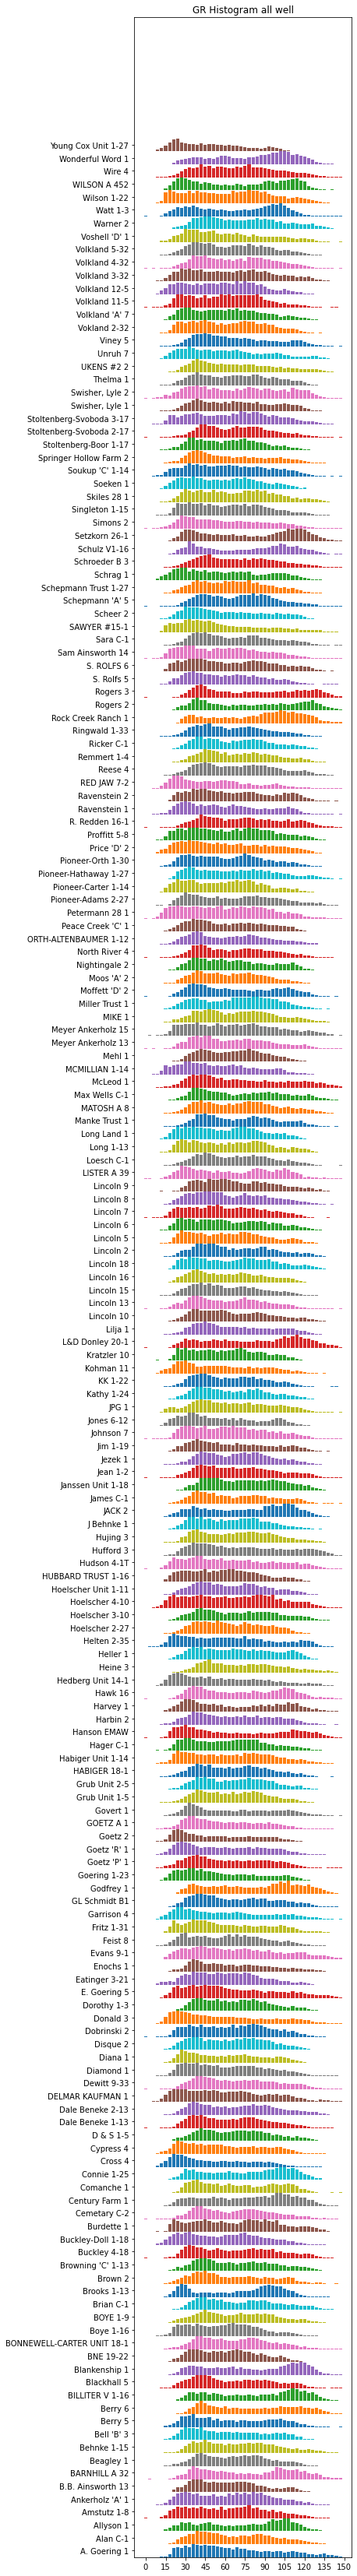

In [6]:
plt.figure(figsize=(5,60))
for num, i in enumerate(gr_hist):
    plt.bar(range(len(gr_hist[0])), i, bottom=num)
    
plt.xticks(np.arange(len(gr_ticks))[::5], np.int16(gr_ticks)[::5]);
plt.yticks(np.arange(len(well_name))+0.5, well_name);
plt.title('GR Histogram all well')

Text(0.5, 1.0, 'RHOB Histogram all well')

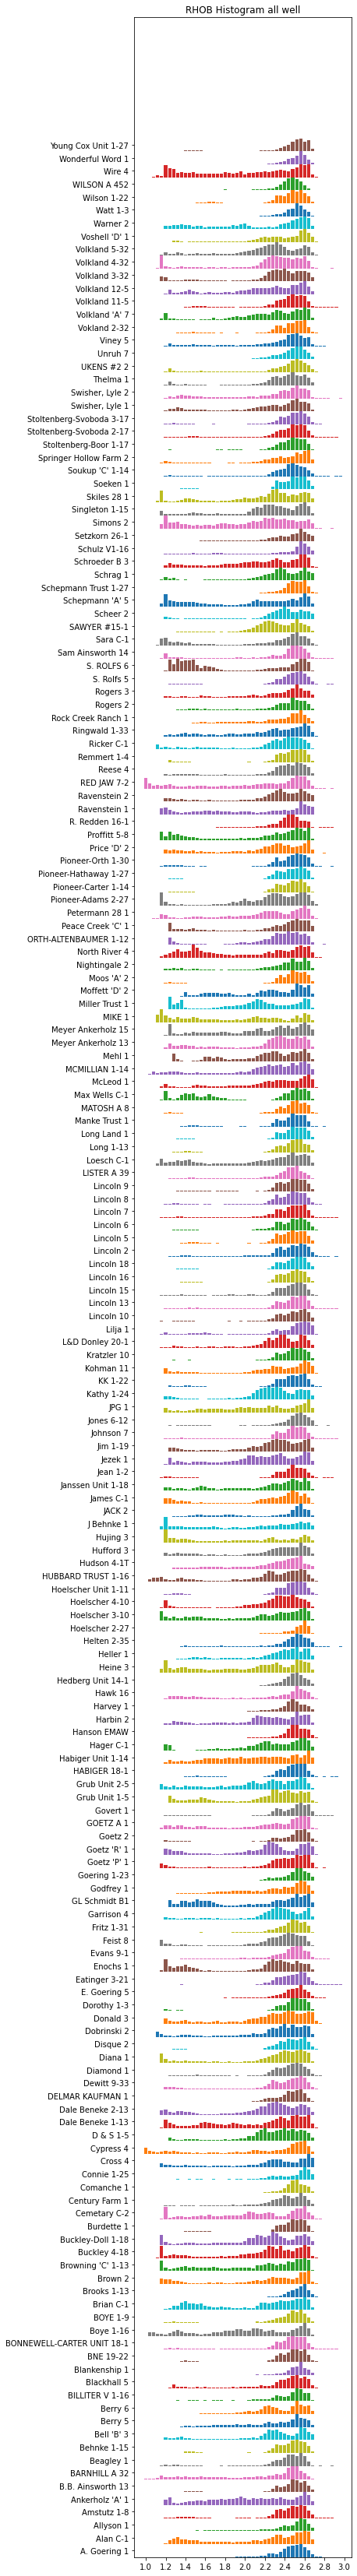

In [7]:
plt.figure(figsize=(5,60))
for num, i in enumerate(rhob_hist):
    plt.bar(range(len(rhob_hist[0])), i, bottom=num)
    
plt.xticks(np.arange(len(rhob_ticks))[::5], np.round(rhob_ticks,2)[::5]);
plt.yticks(np.arange(len(well_name))+0.5, well_name);
plt.title('RHOB Histogram all well')